# Basic Usage
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/maxmouchet/HMMBase.jl/master?filepath=/examples/basic_usage.inpynb)

In [1]:
using Distributions
using HMMBase
using PyPlot
using Seaborn

rc("axes", xmargin = 0) # hide
set_style("whitegrid")  # hide

### Model Specification

B can contains any probability distribution from the `Distributions` package

In [2]:
a = [0.6, 0.4]
A = [0.9 0.1; 0.1 0.9]
B = [MvNormal([0.0, 5.0], ones(2) * 1), MvNormal([0.0, 5.0], ones(2) * 3)]
hmm = HMM(a, A, B)
size(hmm) # (number of states, observations dimension)

(2, 2)

### Sampling

In [3]:
z, y = rand(hmm, 500, seq = true)

([1, 1, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 2, 2, 2, 1, 2, 2, 2], [1.426696383276439 5.173141090149424; 1.026558953604253 4.715777131699473; … ; 5.02942105948131 3.182017308948985; -0.1655499050927284 6.259289523607835])

Let's plot the observations and the hidden state sequence:

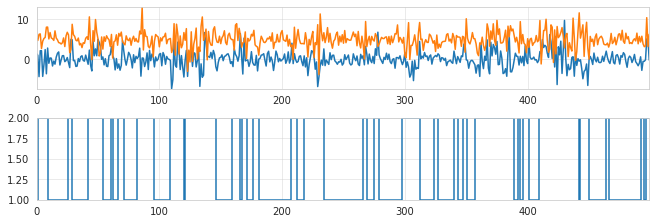

In [4]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(y)
axes[2].plot(z, linestyle = :steps)
gcf() # hide

We can also drop the time dimension and plot the data in the plane:

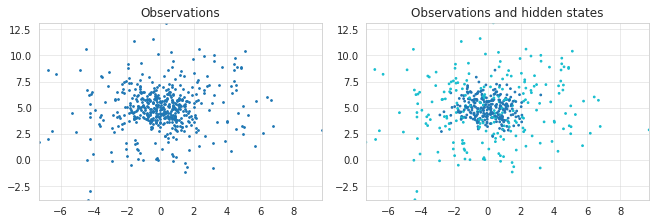

In [5]:
_, axes = subplots(ncols = 2, figsize = (9, 3))
axes[1].scatter(y[:, 1], y[:, 2], s = 3.0)
axes[2].scatter(y[:, 1], y[:, 2], s = 3.0, c = z, cmap = "tab10")
axes[1].set_title("Observations")
axes[2].set_title("Observations and hidden states")
gcf() # hide

### Inference

In [6]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((500, 2), (500, 2), (500, 2))

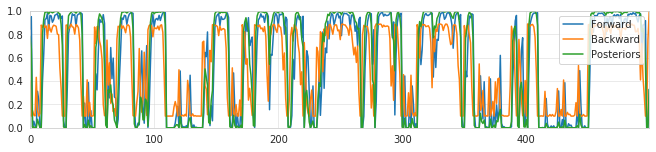

In [7]:
figure(figsize = (9, 2)) # hide
plot([α[:, 1] β[:, 1] γ[:, 1]])
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")
gcf() # hide

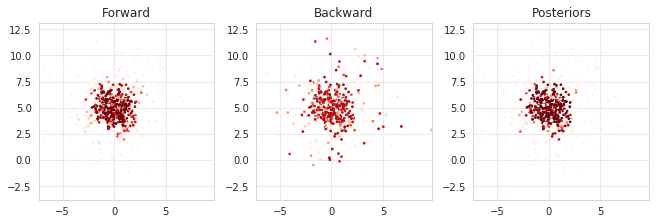

In [8]:
_, axes = subplots(ncols = 3, figsize = (9, 3))
for (ax, probs, title) in zip(axes, [α, β, γ], ["Forward", "Backward", "Posteriors"])
    ax.scatter(y[:, 1], y[:, 2], s = 3.0, c = probs[:, 1], cmap = "Reds")
    ax.set_title(title)
end
gcf() # hide

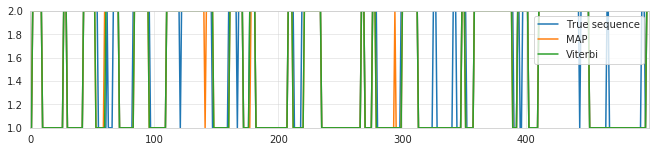

In [9]:
z_map = [z.I[2] for z in argmax(γ, dims = 2)][:]
z_viterbi = viterbi(hmm, y)

figure(figsize = (9, 2)) # hide
plot([z z_map z_viterbi])
legend(["True sequence", "MAP", "Viterbi"], loc = "upper right")
gcf() # hide

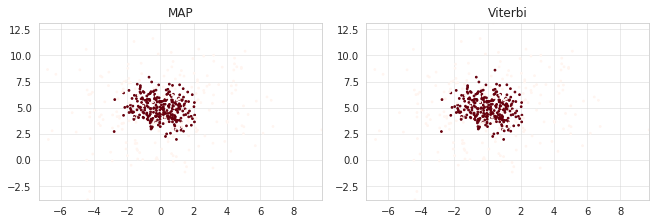

In [10]:
_, axes = subplots(ncols = 2, figsize = (9, 3))
for (ax, seq, title) in zip(axes, [z_map, z_viterbi], ["MAP", "Viterbi"])
    ax.scatter(y[:, 1], y[:, 2], s = 3.0, c = seq, cmap = "Reds_r")
    ax.set_title(title)
end
gcf() # hide

### Parameters Estimation

In [11]:
hmm = HMM(randtransmat(2), [MvNormal(rand(2), ones(2)), MvNormal(rand(2), ones(2))])
hmm, hist = fit_mle(hmm, y, display = :iter, init = :kmeans)
hmm

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       4.687684e+03
      1       3.536684e+03      -1.151000e+03 |        2
      2       3.495840e+03      -4.084371e+01 |        2
      3       3.464015e+03      -3.182536e+01 |        2
      4       3.435900e+03      -2.811456e+01 |        2
      5       3.414439e+03      -2.146108e+01 |        2
      6       3.395215e+03      -1.922411e+01 |        2
      7       3.378738e+03      -1.647673e+01 |        2
      8       3.363226e+03      -1.551249e+01 |        2
      9       3.349409e+03      -1.381702e+01 |        2
     10       3.343170e+03      -6.238671e+00 |        2
     11       3.342115e+03      -1.054861e+00 |        2
     12       3.341767e+03      -3.485603e-01 |        2
     13       3.341017e+03      -7.497006e-01 |        2
     14       3.340483e+03      -5.337342e-01 |        2
     15       3.340249e+03      -2.339167e-01 |        

HMMBase.HMM{Distributions.Multivariate,Float64}([0.9999999527286644, 4.727133569057712e-8], [0.913365869840597 0.08663413015940295; 0.10774337459650439 0.8922566254034956], Distributions.Distribution{Distributions.Multivariate,S} where S<:Distributions.ValueSupport[DiagNormal(
dim: 2
μ: [0.014117068423275751, 4.934846084676134]
Σ: [1.074800585770878 0.0; 0.0 1.196598516242448]
)
, DiagNormal(
dim: 2
μ: [0.1560887535393272, 4.8888938914556945]
Σ: [9.050539371085362 0.0; 0.0 8.823083563374764]
)
])

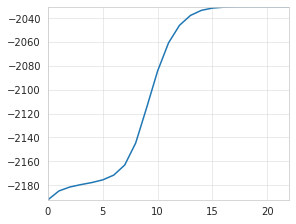

In [12]:
figure(figsize = (4, 3)) # hide
plot(hist.logtots)
gcf() # hide

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*